In [87]:
%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x=df.iloc[:,2:4].values   # conveted to numpy arrays
x.shape

(400, 2)

In [4]:
y=df.iloc[:,-1].values
y.shape

(400,)

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [6]:
x_train.shape

(320, 2)

In [51]:
x_test.shape

(80, 2)

# Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.22846756, -0.95214899],
       [-0.22846756, -0.59936511],
       [ 0.25378586, -0.39357451],
       [-0.13201687, -0.48177048],
       [ 0.83248997, -1.12854093],
       [ 0.6395886 , -0.92275033],
       [-0.22846756,  0.78237175],
       [ 0.25378586,  0.01800668],
       [-0.22846756,  2.25230458],
       [-1.00007304,  0.51778384],
       [-1.00007304, -0.36417586],
       [-0.6142703 , -0.07018929],
       [-1.19297441,  0.25319593],
       [-1.28942509, -1.27553421],
       [-1.67522783, -1.39312884],
       [-1.8681292 ,  0.45898653],
       [-0.42136893,  2.31110189],
       [ 1.02539134,  0.57658115],
       [-1.77167852,  0.16499996],
       [ 1.89344751, -1.30493287],
       [-0.03556619, -1.09914227],
       [ 0.25378586,  0.04740533],
       [-1.77167852, -1.33433152],
       [ 1.12184203, -1.0109463 ],
       [-1.38587578, -0.65816242],
       [ 1.3147434 ,  2.22290592],
       [ 0.35023655,  0.04740533],
       [ 2.18279956, -0.83455436],
       [-1.19297441,

In [10]:
x_test=scaler.fit_transform(x_test)

# first method

In [11]:
np.sqrt(x_train.shape[0])

17.88854381999832

In [12]:
k=17

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

# train model

In [14]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [15]:
y_pred=knn.predict(x_test)

In [16]:
y_pred.shape

(80,)

In [17]:
y_test.shape

(80,)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(y_test,y_pred)

0.95

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion_matrix(y_test,y_pred)

array([[50,  1],
       [ 3, 26]], dtype=int64)

# Create a meshgrid

In [36]:
a=np.arange(start=x_train[:,0].min()-1,stop=x_train[:,0].max()+1,step=0.01)
print(a.shape)
b=np.arange(start=x_train[:,1].min()-1,stop=x_train[:,1].max()+1,step=0.01)
b.shape

(606,)


(594,)

In [38]:
XX,YY=np.meshgrid(a,b)
print(XX.shape)
YY.shape

(594, 606)


(594, 606)

# Classifying every point on the meshgrid

In [55]:
# total customer=594*660
# print(XX[0][0])    # age of first customer
# print(yy[0][0])    # salary of first customer
# knn.predict(np.array(['2.8681292018081703','-50.0'],dtype='float').reshape(1,2))

-2.8681292018081703
-50.0


array([0], dtype=int64)

In [63]:
input_array=np.array([XX.ravel(),YY.ravel()]).T
input_array

array([[-2.8681292 , -2.62831809],
       [-2.8581292 , -2.62831809],
       [-2.8481292 , -2.62831809],
       ...,
       [ 3.1618708 ,  3.30168191],
       [ 3.1718708 ,  3.30168191],
       [ 3.1818708 ,  3.30168191]])

In [65]:
label=knn.predict(input_array)

# plotting the array as an image

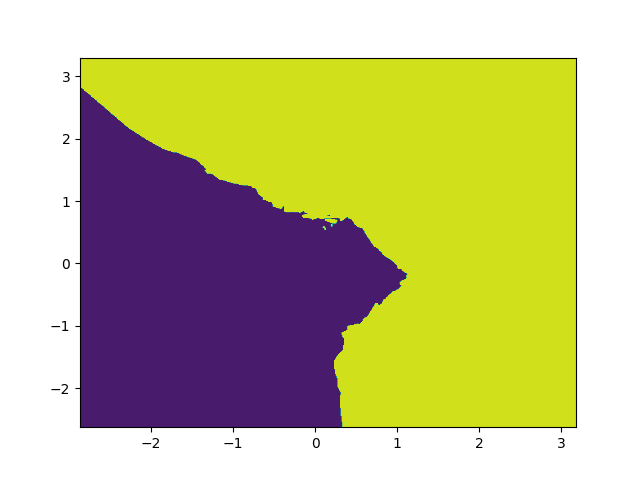

In [107]:
fig=plt.figure()
# ax=fig.add_subplot(111,projection='3d')
plt.contourf(XX,YY,label.reshape(XX.shape))
plt.show()

# Plotting all training data on the meshgrid

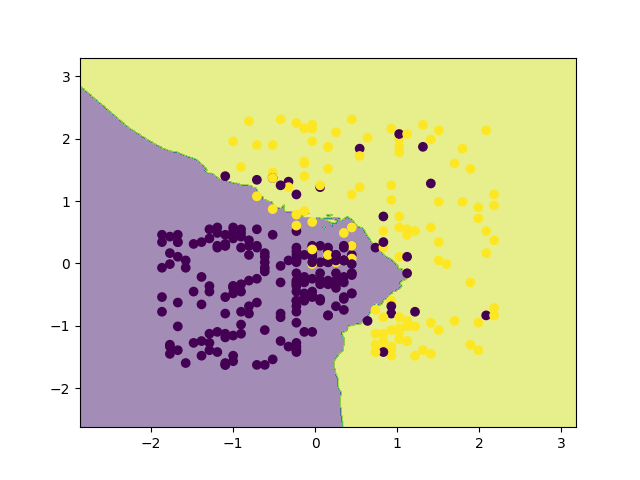

In [112]:
fig2=plt.figure()
# ax1=fig2.add_subplot(111,projection='3d')
plt.contourf(XX,YY,label.reshape(XX.shape),alpha=0.5)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
# sns.scatterplot(x=x_train[:,0],y=x_train[:,1])
plt.show()

# Effect of K on decision boundary

In [ ]:
# k is number of nearest neighbors
# if k is less the overfitting problem
# if k=n(no. of rows)  underfitting (if no. of not purchase greater than purchase then due
# to majority new test will be classified as not purchased)

In [ ]:
# effect on training error rate and validation error rate

In [22]:
x=np.linspace(-40,30,100)
y=np.linspace(-50,50,90)
xx,yy=np.meshgrid(x,y)

In [23]:
print(xx.shape)
yy.shape

(90, 100)


(90, 100)

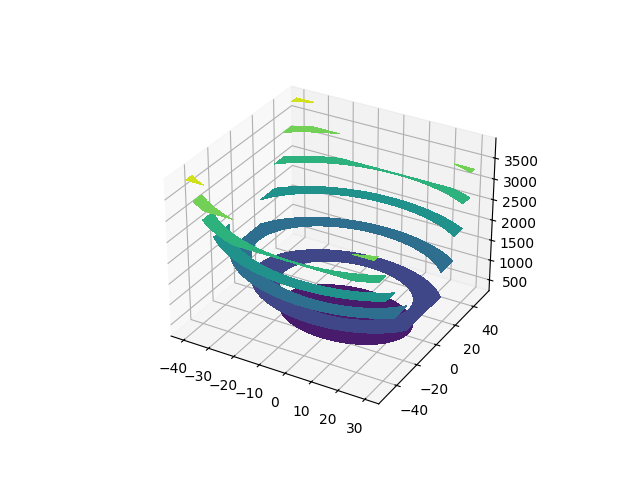

In [28]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
z=(xx**2)+(yy**2)
ax.contourf(xx,yy,z)
plt.show()

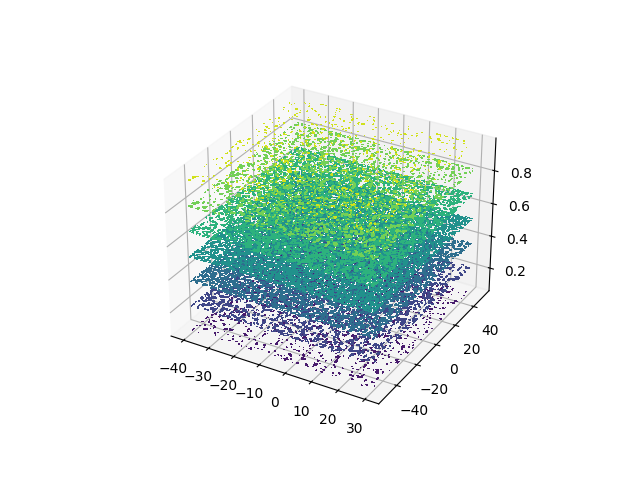

In [27]:
z=np.random.random((90,100))
fig1=plt.figure()
ax1=fig1.add_subplot(111,projection='3d')
ax1.contourf(xx,yy,z)
plt.show()

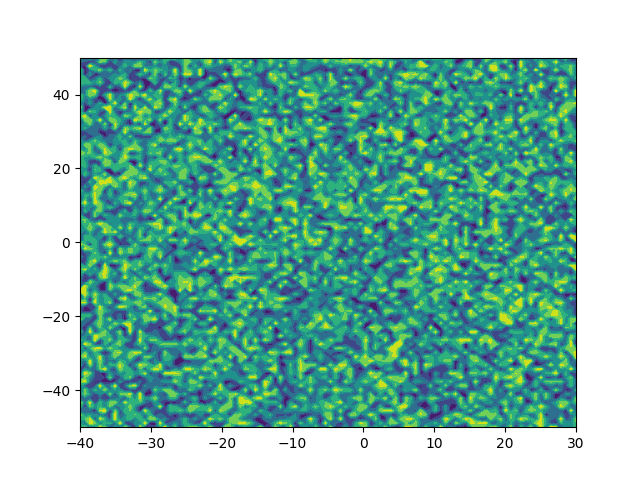

In [100]:
z=np.random.random((90,100))
fig=plt.figure()
plt.contourf(xx,yy,z)

# Purpose of meshgrid

In [26]:
# meshgrid is very useful to evaluate functions on grid. we can apply any fuction
# to the points of meshgrid to plot function 